# Classification Predict Student Exam

© Explore Data Science Academy

---
### Honour Code

I {**LEBOHANG, LEKALAKALA**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Loading Packages and Data</a>

<a href=#two>2. Data Exploratoty and Engineering</a>

<a href=#three>3. Training Models</a>

<a href=#four>4. Model Performance</a>

<a href=#five>5. Model Explanations</a>

<a href=#six>6. Model Submission</a>

<a href=#seven>7. Conclusion</a>

<a id="one"></a>
## 1. Loading packages and data
<a href=#cont>Back to Table of Contents</a>

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#Libraries for Natural Language processing
import nltk
import string

#Libraries for vectorising
from sklearn.feature_extraction.text import TfidfVectorizer

#Library for feature selection and resampling
from sklearn.feature_selection import SelectKBest

#Libraries for model selection
from sklearn.model_selection import train_test_split

#Libraries for models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Libraries for measuring metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#making sure that we can see all rows and cols
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [174]:
df = pd.read_csv('../data/train_set.csv')
dft = pd.read_csv('../data/test_set.csv')

<a id="two"></a>
## 2. Data Exploratory and Engineering
<a href=#cont>Back to Table of Contents</a>

In [175]:
print(df.shape)
print(dft.shape)

(33000, 2)
(5682, 2)


In [176]:
print(df.info())
print(dft.info())

print(df.isnull().sum())
print(dft.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB
None
lang_id    0
text       0
dtype: int64
index    0
text     0
dtype: int64


In [177]:
df.tail()

,lang_id,text
32995,tsn,popo ya dipolateforomo tse ke go tlisa boeteledipele ka mo saenseng ya lefatse ka mo go rona mme se ke kgato e kgolo ya go ya pele ka popontšhwa ya thekeniki ya biothekeniki ga bua motsamaisi wa thekenoloji ya biotekeniki wa lefapha la saense le thekenoloji mor ben durham
32996,sot,modise mosadi na o ntse o sa utlwe hore thabang o rata ho iketsa sengangele jwang hona jwale ke mona o se a bolela ka moo a batlang ho lokollelwa ngwana wa hae ka teng wena jwale o batla ho jarisa nna melato ya hae jwalo ka ha eka ke nna ya mo rommeng hore a mathakake le banana ba motse oo kaofela
32997,eng,closing date for the submission of completed tenders is august at h no late submissions will be considered submissions must be enclosed in a sealed envelope and addressed to the chief executive officer at the above address
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwalo mthetho ujongene ujungene nesohlwayo sokudliwa imali okanye ukuvalelwa ixesha elingadluliyo kwiinyanga ezintandathu okanye kuzo zombini isohlwayo sokudliwa imali okanye ukuvalelwa
32999,sot,mafapha a mang le ona a lokela ho etsa ditlaleho tsa ona ho latela dipehelo tsa nema merero yohle e lokela ho hlahlojwa ke komiti ya ditaba tsa tikoloho eo e kenyeleditseng motsamaisi-kakaretso wa lefapha


In [178]:
dft.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlelela kgato eo."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye imitlolo engezelelako ukuqedelela ukutloliswa kwesibawo sakho.
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini naticocisana.
4,5,Winste op buitelandse valuta.


In [179]:
df['lang_id'].unique()

array(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'], dtype=object)

In [180]:
lst = list(df['lang_id'])

def seperate_lang(sent_list):
    lang = {}
    for x in sent_list:
        if x in lang:
            lang[x] += 1
        else:
            lang[x] = 1
    return lang
seperate_lang(lst)

{'xho': 3000,
 'eng': 3000,
 'nso': 3000,
 'ven': 3000,
 'tsn': 3000,
 'nbl': 3000,
 'zul': 3000,
 'ssw': 3000,
 'tso': 3000,
 'sot': 3000,
 'afr': 3000}

### Observations:

- The df and the dft dataframes have the shapes (33000, 2), (5682, 2) respectively.
- The df datase has two columns with the dtype of object (text, lang_id), while dft contains a columns with a dtype of object(text) and the other(index) has a numerical dtype of int64
- There are no null values in the datasets.
- The data is equally balanced, since there are 3000 texts for each lang_id.

**2.1 Remove punctuations**

In [181]:
def remove_punctuation(post):
    """
    Remove punctuation marks from the given post.

    Args:
        post (str): The input post from which punctuation marks are to be removed.

    Returns:
        str: The post with punctuation marks removed.
    """
    return ''.join([l for l in post if l not in string.punctuation])
df['clean_text'] = df['text'].apply(remove_punctuation).str.lower()
dft['clean_text'] = dft['text'].apply(remove_punctuation).str.lower()

**2.2 Tokenizing**

In [182]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
def tokenize_text(text):
    """
    Tokenizes the given text by splitting it into words, removing stopwords, and removing words with a length less than or equal to 2.

    Args:
        text (str): The input text.

    Returns:
        list: The tokenized words.
    """

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))

    # Remove stopwords and punctuation
    return [word for word in tokens if word not in stop_words and len(word) > 2]

In [183]:
df['token_text'] = df['clean_text'].apply(tokenize_text)
dft['token_text'] = dft['clean_text'].apply(tokenize_text)

**2.3 Lemmatizing**

In [185]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
    
def lemmatize_words(words, lemmatizer):
    """ Groups words of similar meaning together.
    Args:
        words: tokenized words
        lemmatizer: 
    Returns: """
    
    return [lemmatizer.lemmatize(word) for word in words]

df['lemma'] = df['token_text'].apply(lemmatize_words, args = (lemmatizer,))
dft['lemma'] = dft['token_text'].apply(lemmatize_words, args = (lemmatizer,))

In [186]:
df['lemma'] = df['lemma'].apply(lambda x: ' '.join(x))
df['token_text'] = df['token_text'].apply(lambda x: ' '.join(x))

dft['lemma'] = dft['lemma'].apply(lambda x: ' '.join(x))
dft['token_text'] = dft['token_text'].apply(lambda x: ' '.join(x))

### Observations:

- The texts were cleaned by removing punctuations and stopwords so that texts have less noice before raining the model.
- The texts were tokenized and lemmatized. These columns will be used to check which columns contribute better in predictions

<a id="three"></a>
## 3. Training Models
<a href=#cont>Back to Table of Contents</a>

### 3.1 Convert text to numerical values

In [160]:
tf = TfidfVectorizer(max_features=3000)

# Transforming the 'cleaned_message' column of the DataFrame into a matrix of TF-IDF features
X = tf.fit_transform(df['clean_text']).toarray()
# Transforming the 'cleaned_message' column of the testing dataFrame into a matrix of TF-IDF features
test = tf.transform(dft['clean_text']).toarray()

# Converting the 'sentiment' column the DataFrame into a NumPy array
y = np.array(df['lang_id'])

In [161]:
test.shape

(5682, 3000)

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## a) Logistic Regression

In [163]:
lr = LogisticRegression(max_iter=1000)

lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)

f1 = f1_score(y_test, pred_lr, average='macro')
accuracy = accuracy_score(y_test, pred_lr)

print("F1-score:", f1)
print("accuracy:", accuracy)

F1-score: 0.9854641381235552
accuracy: 0.9856060606060606


## b) Random Forest

In [165]:
from sklearn.ensemble import RandomForestClassifier
# tuning

forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

pred_forest = forest.predict(X_test)

f1 = f1_score(y_test, pred_forest, average='macro')
accuracy = accuracy_score(y_test, pred_forest)

print("F1-score:", f1)
print("accuracy:", accuracy)

F1-score: 0.9774177032018293
accuracy: 0.9771212121212122


## c) Decision Tree

In [166]:
from sklearn.preprocessing import StandardScaler

#Standarise the data
standard_scaler = StandardScaler()
X_trans = standard_scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.20, random_state=50)

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print("F1-score:", f1)
print("accuracy:", accuracy)

F1-score: 0.9544404411511045
accuracy: 0.9545454545454546


## d) Support Vector Model

In [167]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred_svm = svc.predict(X_test)

f1 = f1_score(y_test, y_pred_svm, average='macro')
accuracy = accuracy_score(y_test, y_pred_svm)

print("F1-score:", f1)
print("accuracy:", accuracy)

F1-score: 0.9738304413006726
accuracy: 0.973939393939394


<a id="five"></a>
## 5. Model Performance
<a href=#cont>Back to Table of Contents</a>

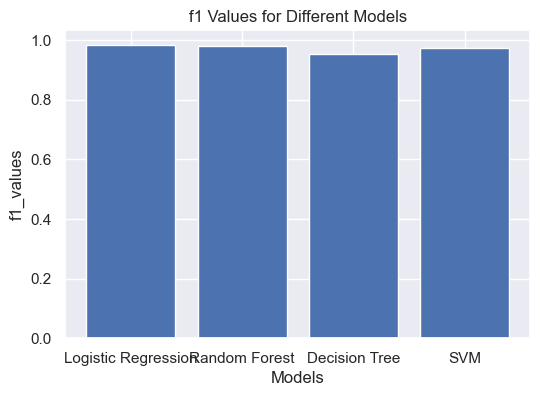

In [168]:

from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the models and calculate f1 score
models = [lr, forest, tree, svc]
model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM']
f1_values = []

for model in models:
    if model == lm_full:
        # Set a higher max_iter value
        model.set_params(max_iter=1000)
        model.fit(X_train_scaled, y_train)
    else:
        model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test_scaled)  # Use scaled test data
    f1 = f1_score(y_test, y_pred, average='macro')
    f1_values.append(f1)

# Plot the f1 values
plt.figure(figsize=(6, 4))
plt.bar(model_names, f1_values)
plt.xlabel('Models')
plt.ylabel('f1_values')
plt.title('f1 Values for Different Models')
plt.savefig('plot.png')
plt.show()


<a id="sic"></a>
## 6. Model Submission
<a href=#cont>Back to Table of Contents</a>

In [170]:
pred_lr = lr.predict(test)
index = range(1, 1 + len(pred_lr))

# Create a DataFrame with 'index' as the header name and set the index explicitly
df = pd.DataFrame({'index': index, 'lang_id': pred_lr})

# Specify the file path where you want to save the DataFrame
file_path = '../predictions/predictions.csv'  # Provide the folder name and file name

# Save the DataFrame to a file
df.to_csv(file_path, index = False)

<a id="seven"></a>
## 7. Conclusion
<a href=#cont>Back to Table of Contents</a>

- The model that performed better out of all 4 models is the Logistic regression model with the f1_score of 0.985.
- The token_text, lemma and text did not make the model to perform any better. Hence the clean_text was used .